<center>
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-SkillsNetwork/labs/Module%206/images/IDSNlogo.png" width="300" alt="cognitiveclass.ai logo"  />
</center>

# Analyzing Where Do People Drink?

Estimated time needed: **30** minutes

## Objectives

After completing this lab you will be able to:

*   Be confident about your data analysis skills


This dataset is from the story: \<a href=[https://fivethirtyeight.com/features/dear-mona-followup-where-do-people-drink-the-most-beer-wine-and-spirits/?utm_medium=Exinfluencer\&utm_source=Exinfluencer\&utm_content=000026UJ\&utm_term=10006555\&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkDA0101ENSkillsNetwork20235326-2021-01-01>](https://fivethirtyeight.com/features/dear-mona-followup-where-do-people-drink-the-most-beer-wine-and-spirits/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkDA0101ENSkillsNetwork20235326-2021-01-01%3E)  Dear Mona Followup: Where Do People Drink The Most Beer, Wine And Spirits? </a>  The dataset contains average serving sizes per person such as average wine, spirit, beer servings, as well as several other metrics. You will be asked to analyze the data and predict the total liters served given the servings. At the end of the lab, you will be instructed on how you can share your notebook.


You will need the following libraries:


In [1]:
import piplite
await piplite.install(['pandas'])
await piplite.install(['matplotlib'])
await piplite.install(['scipy'])
await piplite.install(['seaborn'])
await piplite.install(['ipywidgets'])
await piplite.install(['tqdm'])

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns


/lib/python3.9/site-packages/pandas/compat/__init__.py:124: UserWarning: Could not import the lzma module. Your installed Python is incomplete. Attempting to use lzma compression will result in a RuntimeError.
  warnings.warn(msg)


This function will download the dataset into your browser


In [3]:
#This function will download the dataset into your browser 

from pyodide.http import pyfetch

async def download(url, filename):
    response = await pyfetch(url)
    if response.status == 200:
        with open(filename, "wb") as f:
            f.write(await response.bytes())

<b>Importing the Data</b>


you will need to download the dataset; if you are running locally, please comment out the following


In [4]:
path = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-SkillsNetwork/labs/Module%206/drinks.csv'


In [5]:
await download(path, "auto.csv")
path="auto.csv"

Load the csv:


In [6]:
df= pd.read_csv(path)


We use the method  <code>head()</code>  to display the first 5 columns of the dataframe:


In [7]:
df.head()

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,Afghanistan,0,0,0,0.0,Asia
1,Albania,89,132,54,4.9,Europe
2,Algeria,25,0,14,0.7,Africa
3,Andorra,245,138,312,12.4,Europe
4,Angola,217,57,45,5.9,Africa


<b>Question 1</b>:  Display the data types of each column using the attribute `dtype`.


In [8]:
#for col in df.columns:
#    print('\033[1m' + col + '\033[0m',df[col].dtype)
(df.dtypes).to_frame()

,0
country,object
beer_servings,int64
spirit_servings,int64
wine_servings,int64
total_litres_of_pure_alcohol,float64
continent,object


<b>Question 2</b> Use the method <code>groupby</code> to get the number of wine servings per continent:


In [9]:
conti_wine = df[['continent','wine_servings']].groupby(df['continent'])
conti_wine.sum()

,wine_servings
continent,
Africa,862
Asia,399
Europe,6400
North America,564
Oceania,570
South America,749


<b>Question 3:</b> Perform a statistical summary and analysis of beer servings for each continent:


In [10]:
conti_wine.describe()

wine_servings                                                   \
                      count        mean        std  min   25%    50%     75%   
continent                                                                      
Africa                 53.0   16.264151  38.846419  0.0   1.0    2.0   13.00   
Asia                   44.0    9.068182  21.667034  0.0   0.0    1.0    8.00   
Europe                 45.0  142.222222  97.421738  0.0  59.0  128.0  195.00   
North America          23.0   24.521739  28.266378  1.0   5.0   11.0   34.00   
Oceania                16.0   35.625000  64.555790  0.0   1.0    8.5   23.25   
South America          12.0   62.416667  88.620189  1.0   3.0   12.0   98.50   

                      
                 max  
continent             
Africa         233.0  
Asia           123.0  
Europe         370.0  
North America  100.0  
Oceania        212.0  
South America  221.0

<b>Question 4:</b> Use the function boxplot in the seaborn library to produce a plot that can be used to show the number of beer servings on each continent.


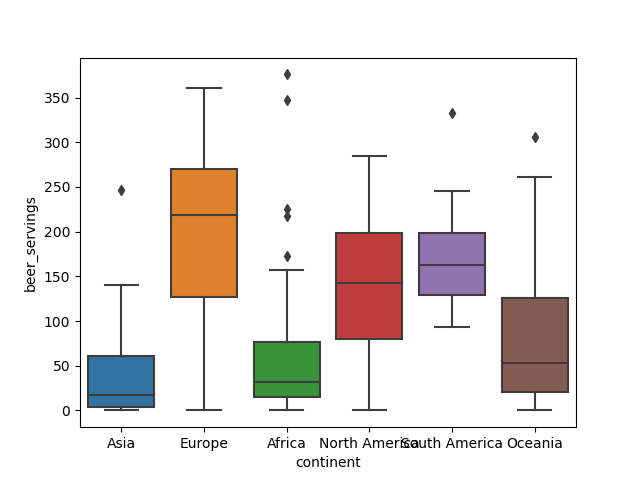

In [11]:
import seaborn as sns 
sns.boxplot(x="continent", y="beer_servings", data=df)
plt.show()

<b>Question 5</b>: Use the function <code> regplot</code> in the seaborn library to determine if the number of wine servings is
negatively or positively correlated with the number of beer servings.


/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


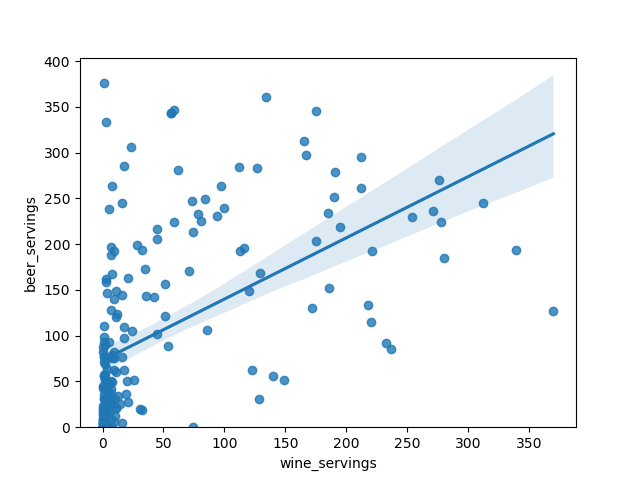

In [12]:
sns.regplot(df['wine_servings'],df['beer_servings'])
plt.ylim(0,)
plt.show()

<b> Question 6:</b> Fit a linear regression model to predict the <code>'total_litres_of_pure_alcohol'</code> using the number of <code>'wine_servings'</code> then calculate $R^{2}$:


In [13]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(df[['wine_servings']],df['total_litres_of_pure_alcohol'])
lr.score(df[['wine_servings']],df['total_litres_of_pure_alcohol'])

0.44568754597876037

<br>
<b>Note:</b> Please use <code>test_size = 0.10</code> and <code>random_state = 0</code> in the following questions.


<b>Question 7: </b>Use list of features to predict the <code>'total_litres_of_pure_alcohol'</code>, split the data into training and testing and determine the $R^2$ on the test data by using the provided code:


In [14]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

x = df[['wine_servings', 'beer_servings','spirit_servings']]
y = df['total_litres_of_pure_alcohol']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.1,random_state=0)
lm2 = LinearRegression()
lm2.fit(x_train, y_train)

lm2.score(x_test, y_test)

0.6990304512837944

<b>Question 8 :</b> Create a pipeline object that scales the data, performs a polynomial transform and fits a linear regression model. Fit the object using the training data in the question above, then calculate the R^2 using the test data. Take a screenshot of your code and the $R^{2}$. There are some hints in the notebook:


<code>'scale'</code>

<code>'polynomial'</code>

<code>'model'</code>

The second element in the tuple contains the model constructor

<code>StandardScaler()</code>

<code>PolynomialFeatures(include_bias=False)</code>

<code>LinearRegression()</code>


In [15]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler,PolynomialFeatures

Input = [('scale',StandardScaler()),('polynomial',PolynomialFeatures(include_bias=False)),('model',LinearRegression())]
pipe = Pipeline(Input)

pipe.fit(x_train,y_train)
pipe.score(x_test,y_test)

0.7076376133886035

<b>Question 9</b>: Create and fit a Ridge regression object using the training data, setting the regularization parameter to 0.1 and calculating the $R^{2}$ using the test data. Take a screenshot of your code and the $R^{2}$.


In [16]:
from sklearn.linear_model import Ridge

ridge = Ridge(alpha = 0.1)
ridge.fit(x_train,y_train)
ridge.score(x_test,y_test)

0.6990304549019178

<b>Question 10</b>: Perform a 2nd order polynomial transform on both the training data and testing data. Create and fit a Ridge regression object using the training data and setting the regularization parameter to 0.1. Calculate the $R^{2}$ utilizing the test data provided. Take a screenshot of your code and the $R^{2}$.


In [17]:
pr = PolynomialFeatures(degree = 2)
x_train_pr = pr.fit_transform(x_train)
x_test_pr = pr.fit_transform(x_test)

ridge2 = Ridge(alpha = 0.1)
ridge2.fit(x_train_pr,y_train)

ridge2.score(x_test_pr,y_test)

0.7076376228095795

<a href="https://dataplatform.cloud.ibm.com/docs/content/wsj/analyze-data/share-notebooks.html/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkDA0101ENSkillsNetwork20235326-2021-01-01"> CLICK HERE</a> to see how to share your notebook


<b>Sources</b>


\<a href=[https://fivethirtyeight.com/features/dear-mona-followup-where-do-people-drink-the-most-beer-wine-and-spirits/?utm_medium=Exinfluencer\&utm_source=Exinfluencer\&utm_content=000026UJ\&utm_term=10006555\&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkDA0101ENSkillsNetwork20235326-2021-01-01>](https://fivethirtyeight.com/features/dear-mona-followup-where-do-people-drink-the-most-beer-wine-and-spirits/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkDA0101ENSkillsNetwork20235326-2021-01-01%3E) Dear Mona Followup: Where Do People Drink The Most Beer, Wine And Spirits?</a> by By Mona Chalabi. You can download the dataset \<a href=[https://github.com/fivethirtyeight/data/tree/master/alcohol-consumption?utm_medium=Exinfluencer\&utm_source=Exinfluencer\&utm_content=000026UJ\&utm_term=10006555\&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkDA0101ENSkillsNetwork20235326-2021-01-01>here](https://github.com/fivethirtyeight/data/tree/master/alcohol-consumption?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkDA0101ENSkillsNetwork20235326-2021-01-01>here)</a>.


### Thank you for completing this lab!

## Author

<a href="https://www.linkedin.com/in/joseph-s-50398b136/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkDA0101ENSkillsNetwork20235326-2021-01-01" target="_blank">Joseph Santarcangelo</a>

## Change Log

| Date (YYYY-MM-DD) | Version | Changed By | Change Description                 |
| ----------------- | ------- | ---------- | ---------------------------------- |
| 2020-08-27        | 2.0     | Lavanya    | Moved lab to course repo in GitLab |

<hr>

## <h3 align="center"> © IBM Corporation 2020. All rights reserved. <h3/>
